## ECE 4200 Assignment 4

## Problem 4 (Linear Regression and Regularization)

### <font color='red'> You can either write your own code or use python package SKLearn in this assignment, other packages for linear regression are not allowed </font>

In this assignment, we use the Concrete Compressive Strength Dataset (https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength) from UCI machine learning repository. We will explore how to use linear regression to predict the concrete compressive strength given the proportion of different materials you use to make high-performance concrete.
Typical instances of this dataset looks like the following:

|Cement kg/m^3| Blast Furnace Slag kg/m^3 |Fly Ash kg/m^3| Water kg/m^3|Superplasticizer kg/m^3|Coarse Aggregate  kg/m^3| Fine Aggregate kg/m^3|Age day|  Concrete compressive strength MPa|
|:------ :|:------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
| 540.0 | 0.0  |0.0    |162.0 |2.5 	 |1040.0| 676.0|28 	  |79.99 |
|540.0 	|0.0 |	0.0 |	162.0 |	2.5 	|1055.0 |	676.0 |	28 |61.89| 
|266.0 	|114.0 |	0.0 |	228.0 |	0.0 |	932.0 |	670.0 	|28 |	45.85| 

### Data Splitting
We randomly split the dataset into two parts, the training set and the test set. The training set consists of 430 data points and the test set consists of 600 data points. Generally, the training dataset is larger than the test dataset. However, in this assignment, we make the training set to be smaller in order to highlight the influence of regularization. (Think about why regularization is more important when you have a smaller training set.) 
Using the following lines, we load all the training data into a numpy array $train$ and all the testing data into a numpy array $test$.

In [100]:
import numpy as np
import pandas
Trainfile = pandas.read_excel('Train.xlsx')
Testfile = pandas.read_excel('Test.xlsx')
train = Trainfile.values
test = Testfile.values
#Trainfile #output all the training samples in a table


The training inputs are stored in array $X_{trn}$, where $X_{trn}[i][j]$ represents the $j$th attribute of the $i$th instance in the training set. The training outputs are stored in array $y_{trn}$, where $y_{trn}[i]$ is the output of the $i$th instance in the training test.
Similarly we store the inputs and outputs of the test set in $X_{tst}$ and $y_{tst}$

In [101]:
X_trn_raw, y_trn = train[:,:-1], train[:,-1:]
X_tst_raw, y_tst = test[:,:-1], test[:,-1:]

### Data Preprocessing
In order to better use linear regression, we shift normalize all the attributes of training input and testing input to make each attribute zero mean and norm no larger than 1. We are not normailizing the output. (Think about why.)
After that, we append a bias attribute 1 to each of the input feartures.

In [102]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs = inputs - np.mean(inputs,axis=0) #shift
inputs = inputs/(np.max(inputs,axis=0)) #normalize
inputs = np.concatenate((inputs, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) #add bias
X_trn = inputs[:X_trn_raw.shape[0],:]
X_tst = inputs[X_trn_raw.shape[0]:,:]

### Let's get started
We do recommend you to understand the aforementioned steps since data preprocessing is a very important skill for a machine learning engineer. However, if you don't understand the previous pre-processing steps, it's totally fine. Now let's see what we get:
1. Training set $[X_{trn}, Y_{trn}]$, where all the input attributes are zero-mean and normalized. At the end of all the training inputs, there is a $1$ at the end to introduce the bias term.
2. Testing set $[X_{tst}, Y_{tst}]$ which has the same property as the training set.

### (1) Linear regression (without regularization)
Let's look at the first task. You can either use functions in Sklearn or write your own code to train a linear regressor on the training set.
The goal here is to find the $w$ which minimizes the training loss
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} ( w^*\cdot x_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^* \cdot x_i - y_i)^2}
\end{equation}

In [103]:
# PART 1: Simple Linear Regression
# store your training loss in l_trn and testing loss in l_tst
#edit within this range
l_trn = 0
l_tst = 0
#=======FILL IN YOUR CODE HERE===========

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

clf1 = LinearRegression()
clf1.fit(X_trn, y_trn)

y_trn_pred = clf1.predict(X_trn)
y_tst_pred = clf1.predict(X_tst)

l_trn = np.sqrt(mean_squared_error(y_trn, y_trn_pred))
l_tst = np.sqrt(mean_squared_error(y_tst, y_tst_pred))

#===========END EDIT=====================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)


The average training loss is:  9.727779122009025
The average test loss is:  10.904551016681253


### (2) Linear Ridge regression

You may observe that training error is smaller than the test error. This is because we are overfitting to the training data. Regularization is a good way to avoid overfitting. Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the same dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrease w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.

2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrease w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain


Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda \cdot x_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda \cdot x_i - y_i)^2}
\end{equation}

### Your response here:
1. For the training error, as we increase the lambda, we can see that the training error will rise and never decreases. From the second plot below, we can see that when lambda is between 10^-1 to 1, the training error starts to increase. We can then see from the first plot that as we continue to increase lambda, the error substantially increases until around lambda = 10^3. This is because the goal of using lambda is to penalize large weight and reduce overfitting. However, training data is not impacted by overfitting. But then as we continue increasing the lambda, the model continue to be smoothed up and gets simple, as a result we learn much less. This causes the model to underfit and the rise in error.
2. For the testing error, as we increase lambda, we can see that the error first decreases, then increases. When the model makes the best predictions for training data, it tends to overfit and it will not best predict the testing data set. But as we increase lambda to penalize large weight, the overfitting will reduce and we can see a decrease of testing error (from lambda equal to 10^-1 to 1). What is important to see is that when lambda is increased and we penalize large weight, the testing error will decrease and the training error will increase at the same time. So we can see the sacrifice in training error predictions for the benefit of testing prediction. This will be the best model as it predicts testing data best. However, as we keep on increasing lambda (from lambda = 10^1), the model will get simpler and will eventually underfit. As a result, the prediction will be bad and testing error increases, as we can see from the first plot. Underfit impacts both testing and training data predictions.

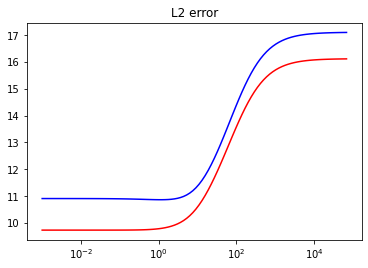

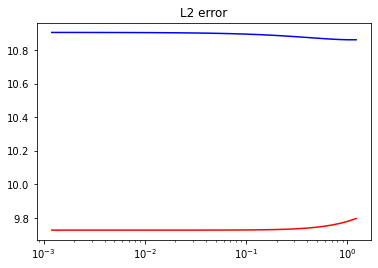

In [108]:
# PART 2: Linear Ridge Regression

# In this part, you will perform linear Ridge Regression.
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector
#edit within this range


#========FILL IN CODE HERE==============

from sklearn.linear_model import Ridge

for i in range(points):
    a = lamb[i] # May need to divide lambda by 2, but it only affects the scale.
    clf2 = Ridge(alpha = a)
    clf2.fit(X_trn, y_trn)
    
    y_trn_pred = clf2.predict(X_trn)
    err_trn.append(np.sqrt(mean_squared_error(y_trn, y_trn_pred)))
    
    y_tst_pred = clf2.predict(X_tst)
    err_tst.append(np.sqrt(mean_squared_error(y_tst, y_tst_pred)))
    
#===============END EDIT================
plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

###  Add more attributes

Can we do more beyond simple linear regression? Since the relationship between each attribute and the final output may not necessarily be linear, we may do better if we add some non-linearity. We can add the square of each attribute to our training input and do linear regression on the new set of attributes.

Remark: This is called polynomial regression, please google it if you are interested.

In [109]:
inputs = np.concatenate((X_trn_raw, X_tst_raw),axis = 0)
inputs_new = np.concatenate((inputs,np.square(inputs)),axis=1) #add square term
inputs_new = inputs_new - np.mean(inputs_new,axis=0) #shift
inputs_new = inputs_new/(np.max(inputs_new,axis=0)) #normalize
inputs_new = np.concatenate((inputs_new, np.ones((X_trn_raw.shape[0]+X_tst_raw.shape[0],1))), axis = 1) # add bias
X_trn_new = inputs_new[:X_trn_raw.shape[0],:]
X_tst_new = inputs_new[X_trn_raw.shape[0]:,:]

### (3) Quadratic regression (without regularization)
Recall now we have $X^{new}_{trn}$ as our new training features and $X^{new}_{tst}$ as our new test features. 
\begin{equation}
    x^{new}_i = (x_i[1],x_i[2], ..., x_i[d], x_i[1]^2,x_i[2]^2, ..., x_i[d]^2 )
\end{equation}
Do the same thing as in Problem (1). Find the minimizer of the training error:
\begin{equation}
    w^* = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w \cdot x^{new}_i - y_i)^2
\end{equation}
Output the squre root of your average training loss and average test loss
\begin{equation}
    l_{trn} = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^* \cdot x^{new}_i - y_i)^2} \text{, }l_{tst} = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^*\cdot x^{new}_i - y_i)^2}
\end{equation}

In [110]:
#PART 3: Quatratic Regression

# store your training loss in l_trn and testing loss in l_tst
#edit within this range
l_trn = 0
l_tst = 0
#============FILL IN CODE HERE============

clf3 = LinearRegression()
clf3.fit(X_trn_new, y_trn)

y_trn_pred = clf3.predict(X_trn_new)
y_tst_pred = clf3.predict(X_tst_new)

l_trn = float(np.sqrt(mean_squared_error(y_trn, y_trn_pred)))
l_tst = float(np.sqrt(mean_squared_error(y_tst, y_tst_pred)))

#================end edit=================
print('The average training loss is: ', l_trn)
print('The average test loss is: ', l_tst)

The average training loss is:  7.481820649524704
The average test loss is:  8.87140092431263


### (4) Quadratic Ridge regression

In this problem, we do the same regularization as in Problem (2) to our new dataset:

Recall that $\lambda$- Ridge regression is to add an additional $\ell_2$-norm of the weight vector to refine the obejective function:

\begin{equation}
    w^\lambda = \arg \min_w \frac1{|S_{trn}|}\sum_{i \in S_{trn}}(w\cdot x^{new}_i - y_i)^2 + \lambda|w|^2
\end{equation}

Try Ridge regression on the new dataset (the dataset with more attributes) under $\lambda = 0.001 \times (1.2)^i, i = 0,1,2,3,...,99$. Plot the training loss and test loss under different regression parameter and answer the flowing questions:
1. Describe the trend of training error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain.


2. Describe the trend of testing error? (Increase w.r.t $\lambda$, decrese w.r.t $\lambda$, remain constant, first increase then decrease or first decrease then increase). Try to explain


Training and testing error are defined without the regularization term:
\begin{equation}
    l_{trn}^\lambda = \sqrt{\frac1{|S_{trn}|}\sum_{i \in S_{trn}} (w^\lambda\cdot x^{new}_i - y_i)^2} \text{, }l_{tst}^\lambda = \sqrt{\frac1{|S_{tst}|}\sum_{i \in S_{tst}} (w^\lambda\cdot x^{new}_i - y_i)^2}
\end{equation}

### Your response here:
1. For the training error, as we increase the lambda, we can see that the training error will rise and never decreases. From the second plot below, we can see that when lambda starts at 10^-3, the training error starts to increase slowly. Then it started to increase dramatically when lambda is around 10^-1. As discussed above, this is because the goal of using lambda is to penalize large weight and reduce overfitting. However, training data is not impacted with overfitting. As we continue to increase lambda to be large, the model gets too simple and we are not learning anything, and it makes our model to severely underfit.
2. For the testing error, as we increase lambda, we can see that the error first decreases, then increases. When the model makes the best predictions for training data, it tends to overfit and it will not best predict the testing data set. But as we increase lambda to penalize large weight, the overfitting will reduce and we can see a decrease of testing error (from lambda equal to 10^-2 to 10^-1 shown in the second plot). It reaches the best test predicting model when lambda = 10^-1. However, as we keep on increasing lambda (from lambda = 10^-1), the model will get simpler and will underfit. In the first plot, we can see how quickly the testing error increases as the lambda gets bigger than 10^-1. Underfit impacts negatively on both testing and training data predictions.

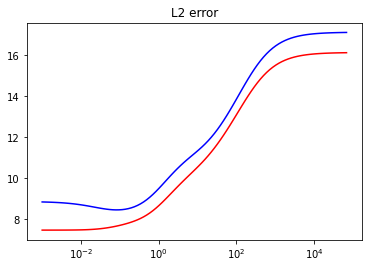

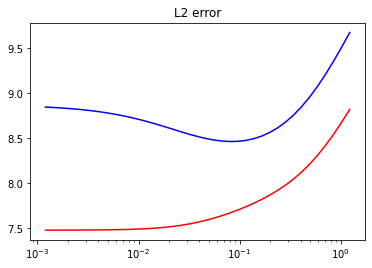

In [111]:
# PART 4: Quadratic Ridge Regression

# In this part, you will perform Ridge Regression. 
# You will plot the training and test error as a function of lambda

import matplotlib.pyplot as plt
%matplotlib inline
lamb = []
points = 100
for i in range(points):  
    lamb.append(0.001*(1.2**i))
    #= 0.001 * [1, 1.2, 1.44, ..., 1.2^99] #lambda values
err_trn = [] # store your training error in this vector
err_tst = [] # store your testing error in this vector

#=========PLEASE FILL IN THE CODE HERE=========

for i in range(points):
    a = lamb[i] # May need to divide lambda by 2, but it only affects the scale.
    clf4 = Ridge(alpha = a)
    clf4.fit(X_trn_new, y_trn)
    
    y_trn_pred = clf4.predict(X_trn_new)
    err_trn.append(np.sqrt(mean_squared_error(y_trn, y_trn_pred)))
    
    y_tst_pred = clf4.predict(X_tst_new)
    err_tst.append(np.sqrt(mean_squared_error(y_tst, y_tst_pred)))

#==================end edit====================

plt.semilogx(lamb,err_trn,color='red')
plt.semilogx(lamb,err_tst,color='blue')
plt.title("L2 error")
plt.show()
plt.semilogx(lamb[1:40],err_trn[1:40],color='red')
plt.semilogx(lamb[1:40],err_tst[1:40],color='blue')
plt.title("L2 error")
plt.show()

### (5) Discussion
Compare the plots of Linear Ridge Regression and Quadratic Ridge Regression. When regularization parameter $\lambda=0$, which method suffers more from overfitting, linear regression or quadratic regression? Explain how you discover it from the plots, and why this method suffers more from overfitting.

### Your Answer Here:
Based on the plots above, we can conclude that the quadratic regression suffers more overfitting when $\lambda=0$. When $\lambda$ is increased for linear regression, we can see that the accuracy only improved by around .1. However, when regularization is applied to quadratic regression, we can see a more significant improvement in accuracy of about .4. This shows that quadratic regression actually suffers more overfitting, which is shown by how quadratic regression improves more than linear regression when $\lambda$ is increased. This also agrees with the fact that quadratic is more complex than linear, and thus it will suffer more overitting.